In [1]:
import numpy as np
import gromacs as gro
import matplotlib.pyplot as plt

In [2]:
scaled = gro.fileformats.XVG('scaled_pdf.xvg')
unscaled = gro.fileformats.XVG('unscaled_pdf.xvg')
full_box = gro.fileformats.XVG('scaled_full_box.xvg')
experiment = np.loadtxt('TN4', comments='#')

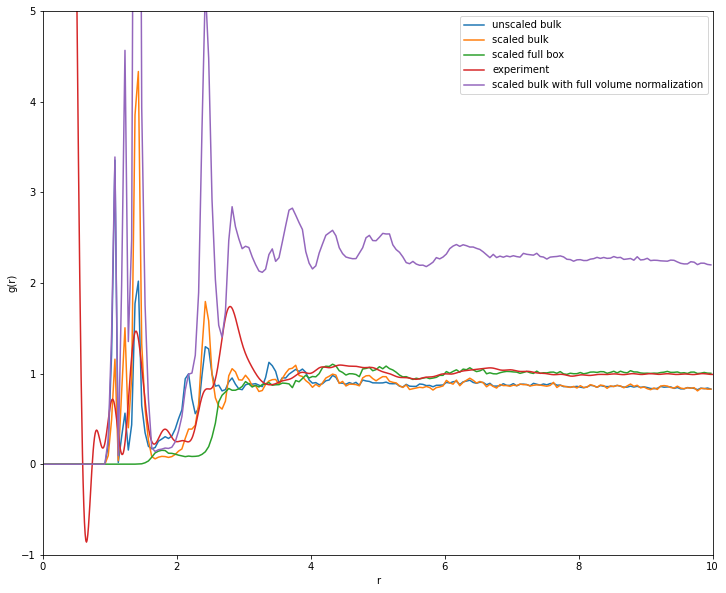

In [6]:
fig = plt.figure(figsize=(12,10))

x = unscaled.array[0,:]
y = unscaled.array[1,:]
plt.plot(x,y,label='unscaled bulk')

x = scaled.array[0,:]
y = scaled.array[1,:]
plt.plot(x,y,label='scaled bulk')

x = full_box.array[0,:]
y = full_box.array[1,:]
plt.plot(x,y,label='scaled full box')

rho = 0.0953
min_idx = np.where(experiment[:,0] == np.min(experiment[:,0]))[0]
max_idx = np.where(experiment[:,0] == np.max(experiment[:,0]))[0]
clean = np.zeros((max_idx[0] - min_idx[0], 2))
clean[:,0] = experiment[min_idx[0]:max_idx[0],0]
clean[:,1] = experiment[min_idx[0]:max_idx[0],1] / (4*np.pi*clean[:,0]*rho) + 1
plt.plot(clean[:,0], clean[:,1], label='experiment') 

xvg = gro.fileformats.XVG('scaled_bulk_full_volumes.xvg')
data = xvg.array
x = data[0,:]
y = data[1,:]
plt.plot(x,y, label='scaled bulk with full volume normalization')

plt.xlabel('r')
plt.ylabel('g(r)')
plt.xlim(0,10)
plt.ylim(-1,5)
plt.legend();